# Algorithms and mathematics of machine learning
## Laboratory 5

To complete the laboratory, you can use the following libraries/modules:
- [numpy](https://numpy.org/)
- [matplotlib](https://matplotlib.org/)
- [pandas](https://pandas.pydata.org/)
- [collections](https://docs.python.org/3/library/collections.html)

### Task 1

Load the file `english.10MB`

> Hint: Encoding `iso-8859-1`

In [1]:
with open('english.10MB', encoding='iso-8859-1') as f:
    text = f.read()

text[:100]

'\n\n\n\n\nThis etext was produced by Normal Wolcott.\n\n\n\n\n\nTen Days that Shook the World\n\nby John Reed\n\n\n\n'

### Exercise 2
Convert all letters to lowercase.

In [2]:
text = text.lower()
text[:100]

'\n\n\n\n\nthis etext was produced by normal wolcott.\n\n\n\n\n\nten days that shook the world\n\nby john reed\n\n\n\n'

### Task 3
Find unique letters (omit other characters) in text and assign a number of occurrences for each, then display a histogram.

Question: What letter occurs most often?

> Hint: `import string`

In [3]:
from collections import Counter
from string import ascii_letters


text_hist = ''.join(c for c in text if c in ascii_letters)
text_hist = Counter(text_hist)

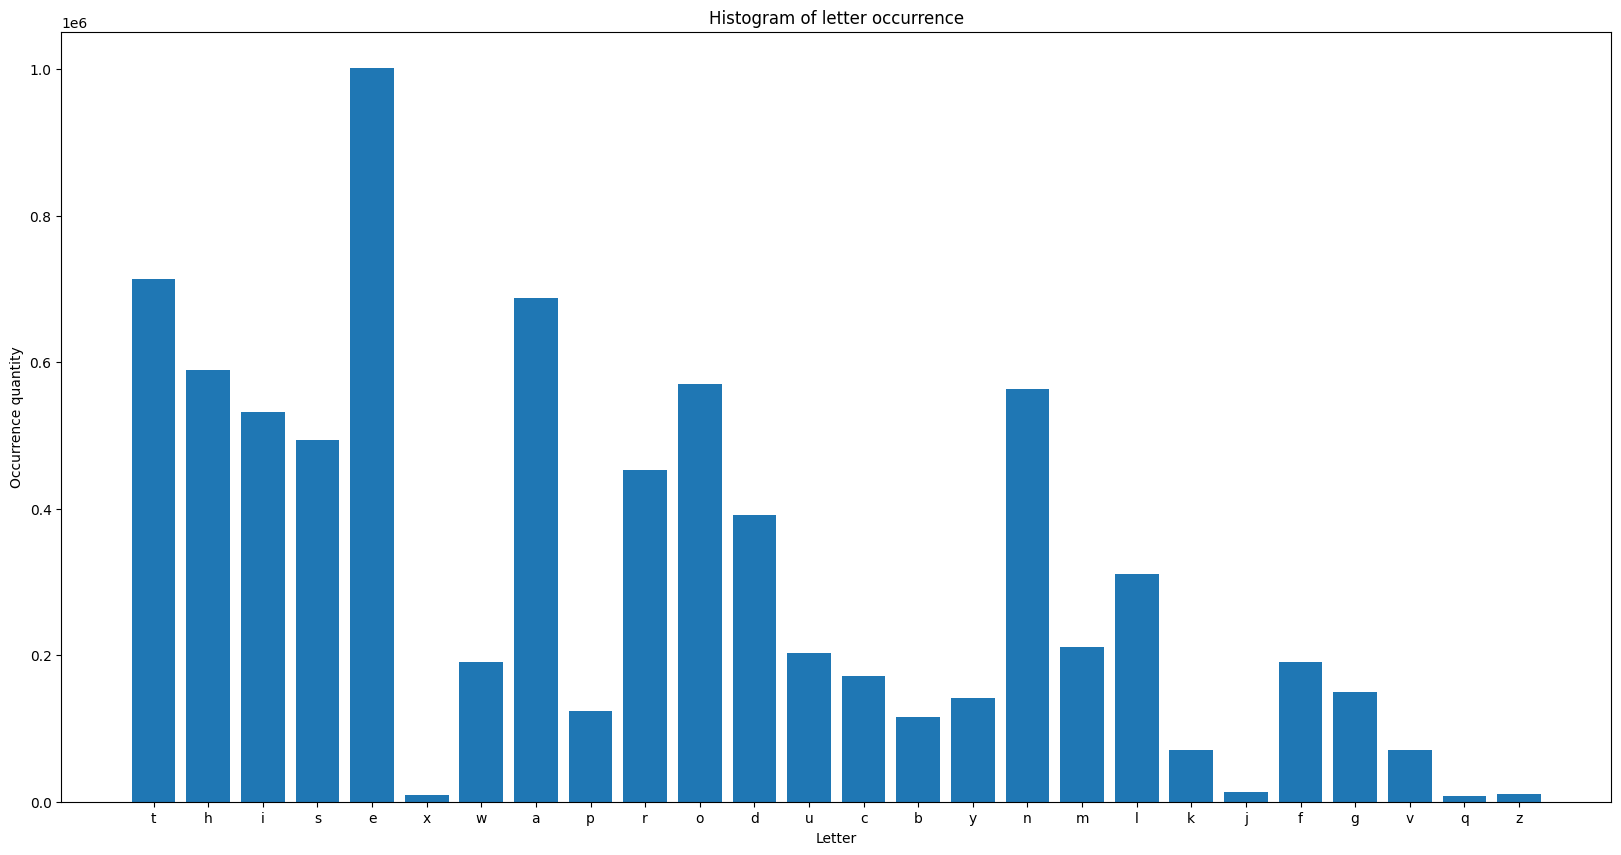

In [4]:
from matplotlib.pyplot import bar, show, figure, xticks, xlabel, ylabel, title

figure(figsize=(20, 10))
bar(x=[i for i in range(len(text_hist.keys()))], height=text_hist.values())
xticks(ticks=[i for i in range(len(text_hist.keys()))], labels=[label for label in text_hist.keys()])
xlabel('Letter')
ylabel('Occurrence quantity')
title('Histogram of letter occurrence')
show()

### Task 4

Write a function that, for a given prefix (a string of letters, e.g. `th` is a prefix of length 2), returns a list of up to five letters that have the highest probability of appearing after it.

```python
In : next('th', s) # th - prefix, s - text
Out: ['e', 'a', 'i', 'o', 'y']
```

In [5]:
from re import findall


def next_letter(prefix: str, txt: str) -> list:
    matches = [value[len(prefix):] for value in findall(pattern=f'{prefix}\w', string=txt)]
    return [value[0] for value in Counter(matches).most_common(5)]


next_letter(prefix='th', txt=text)

['e', 'a', 'i', 'o', 'y']

### Task 5

Write code that reads subsequent characters from the user and suggests the next possible letters (maximum five). Use the function implemented in the previous task.

> Hint: You can use the `input()` function to read characters.

Action example:
```
Press <ENTER> to finish.
Enter the letter: f
Enter another letter (possible: ['o', 'a', 'r', 'e', 'i']): fo
Enter another letter (possible: ['r', 'u', 'l', 'o', 'x']): for
Enter another letter (possible: ['e', 't', 'm', 'g', 'c']): fore
Enter another letter (possible: ['s', 'h', 'i', 'g', 'v']): fores
Enter another letter (possible: ['t', 'a', 'e', 'i', 'k']): forest
Enter another letter (possible: ['s', 'a']): forests
```

In [6]:
def possible_letters_with_user_input() -> None:
    ch = input('Enter the letter: ')
    possible = next_letter(prefix=ch, txt=text)

    while len(possible) > 0:
        user_input = input(f"Enter another letter (possible: {possible}: {ch}")
        ch = f'{ch}{user_input}'

        if user_input == '':
            break

        possible = next_letter(prefix=ch, txt=text)

    return ch

print(f'Your word: {possible_letters_with_user_input()}')

Your word: forests


### Task 6

Complete a task similar to task 5, but at the word level. For convenience, words can be selected from a list using numbers 1-5.

In [7]:
def next_word(prefix: str, txt: str) -> list:
    matches = findall(pattern=f'{prefix} \w+', string=txt)
    return [value[0] for value in Counter(matches).most_common(5)]


def possible_words_with_user_input() -> None:
    ch = input('Enter the word: ')
    possible = next_word(prefix=ch, txt=text)

    while len(possible) > 0:
        possible_str = 'Enter number of next word (possible:'
        for i, j in enumerate(possible):
            possible_str = f'{possible_str}\n\t{i}. {j}'

        user_input = input(f"{possible_str}\n): {ch}")

        if user_input == '':
            break

        ch = possible[int(user_input)]
        possible = next_word(prefix=ch, txt=text)

    return ch

print(f'Your sentence: {possible_words_with_user_input()}')

Your sentence: the dawn and take five mules and go
